## `genalog.generation` module:

This module is responsible for:
- Analog document generation

There are two important concepts to be familiar with:
1. **Template** - controls the layout of the document (i.e. font, langauge, position of the content, etc)
1. **Content** - items to be used to fill the template (i.e. text, images, tables, lists, etc)

We are using a HTML templating engine (**Jinja2**) to build our html templates, and a html-pdf converter (**Weasyprint**) to print the html as a pdf or an image.


In [18]:
from genalog.generation.document import DocumentGenerator
from genalog.generation.content import CompositeContent, ContentType

with open("sample/generation/example.txt", 'r') as f:
    text = f.read()

print(text[:1000])

Time magazine , in a move to reduce the costs of wooing new subscribers , is lowering its circulation guarantee to advertisers for the second consecutive year , increasing its subscription rates and cutting back on merchandise giveaways .
In an announcement to its staff last week , executives at Time Warner Inc. 's weekly magazine said Time will `` dramatically de-emphasize '' its use of electronic giveaways such as telephones in television subscription drives ; cut the circulation it guarantees advertisers by 300,000 , to four million ; and increase the cost of its annual subscription rate by about $ 4 to $ 55 .
In a related development , the news - weekly , for the fourth year in a row , said it wo n't increase its advertising rates in 1990 ; a full , four - color page in the magazine costs about $ 120,000 .
However , because the guaranteed circulation base is being lowered , ad rates will be effectively 7.5 % higher per subscriber , according to Richard Heinemann , Time associate pu

## `genalog.generation.content` Submodule

This module is used to initialize a `Content` object for populating content into a template. It has the following classes:
1. **ContentType** - an enumeration dictating the supported content type (ex. ContentType.PARAGRAPH, ContentType.TITLE, ContentType.COMPOSITE)
1. **Content** - a base class for inheritance. All `Content` classes should be printable, iterable and indexable.
1. **Paragraph** - a class inherited from `Content`. It represents a paragraph block.
1. **Title** - a class inherited from `Content`. It represents a title of a block.
1. **CompositeContent** - a class inherited from `Content`. It is a composite class designed to hold a hybrid collection of extended `Content` classes in the order they would populate the template. It is the base class used to initalize a document.

In [19]:
# Initialize Content Object
paragraphs = text.split('\n\n')
content_types = [ContentType.PARAGRAPH] * len(paragraphs)
content = CompositeContent(paragraphs, content_types)

print(f"Object represention: {repr(content)}\n")
# you can also print the content object like a string
print(f"Transparent string: {content}"[:400])

Object represention: CompositeContent([<genalog.generation.content.Paragraph object at 0x0000018FC3EA4940>, <genalog.generation.content.Paragraph object at 0x0000018FC3EA4520>, <genalog.generation.content.Paragraph object at 0x0000018FC3EA4430>, <genalog.generation.content.Paragraph object at 0x0000018FC3EA45B0>])

Transparent string: ["Time magazine , in a move to reduce the costs of wooing new subscribers , is lowering its circulation guarantee to advertisers for the second consecutive year , increasing its subscription rates and cutting back on merchandise giveaways .
In an announcement to its staff last week , executives at Time Warner Inc. 's weekly magazine said Time will `` dramatically de-emphasize '


In [20]:
# Or iterate the content obj like an array
for paragraph in content:
    print(paragraph[:100])

Time magazine , in a move to reduce the costs of wooing new subscribers , is lowering its circulatio

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes th

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes th

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes th


## `genalog.generation.document` Submodule

This module initializes a document by loading the html template and setting up the document styles. It has two classes:
1. **Document** - given a template and the content, this class populates the content into the template and controls the document style. It can print the document as PDF or PNG.
1. **DocumentGenerator** - a factory class that can generate `Document` classes. This will be the primary object used to generate documents.

In [21]:
# Initalize DocumentGenerator
# The default setting allow to use the built-in templates from the `genalog` package
default_generator = DocumentGenerator()

print(f"Available default templates: {default_generator.template_list}")
print(f"Default styles to generate: {default_generator.styles_to_generate}")

Available default templates: ['columns.html.jinja', 'letter.html.jinja', 'text_block.html.jinja']
Default styles to generate: [{'language': 'en_US', 'font_family': 'Segoe UI', 'font_size': '12px', 'text_align': 'left', 'hyphenate': False}]


C:\Users\menou\AppData\Local\Temp\ipykernel_9888\3407327486.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


{'language': 'en_US', 'font_family': 'Segoe UI', 'font_size': '12px', 'text_align': 'left', 'hyphenate': False}
text_block.html.jinja


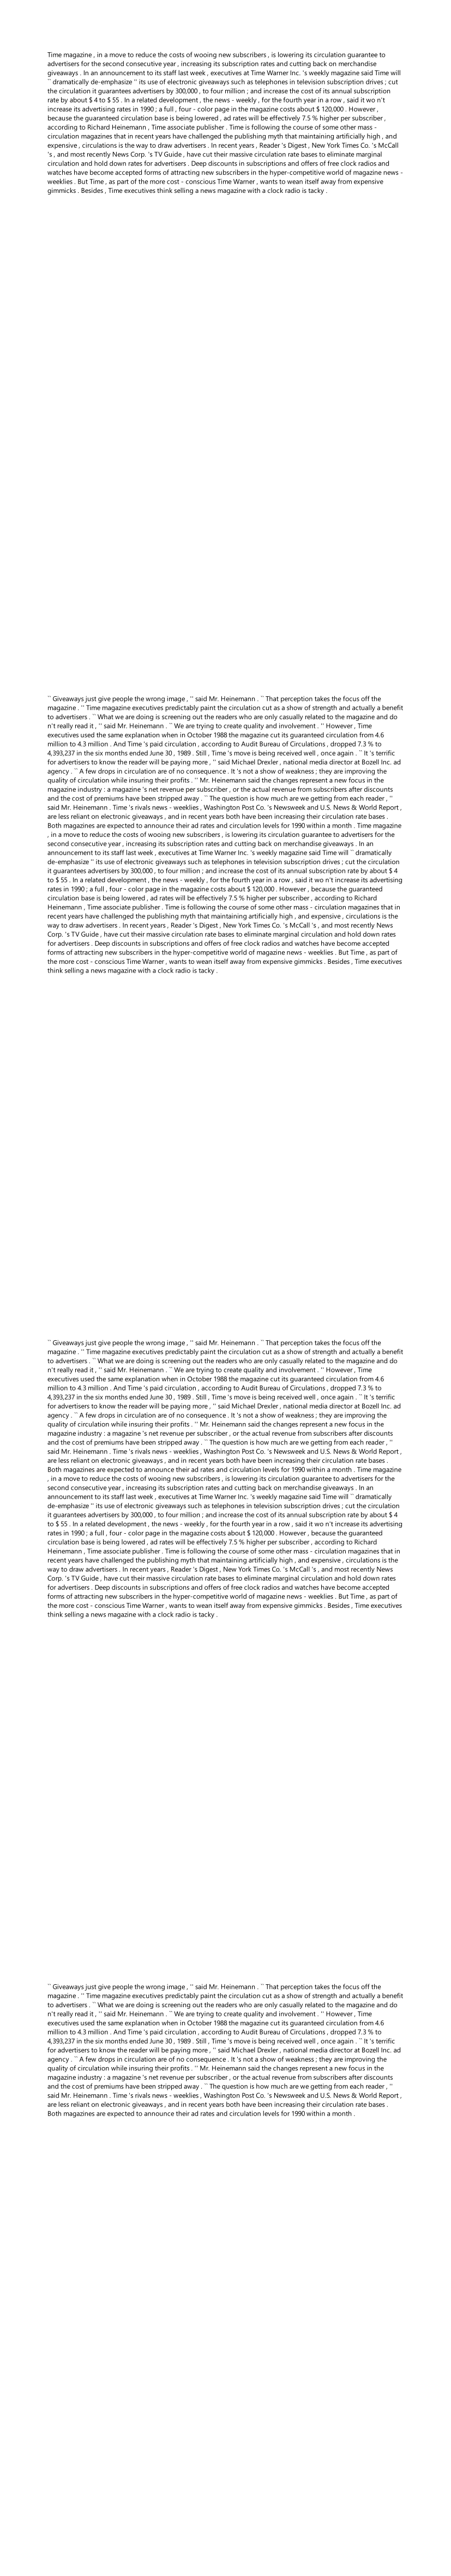

In [22]:
from IPython.core.display import Image, display

# Select specific template, content and create the generator
doc_gen = default_generator.create_generator(content, ['text_block.html.jinja']) 
# we will use the `content` object initialized from above 

for doc in doc_gen:
    print(doc.styles)
    print(doc.template.name)
    image_byte = doc.render_png(resolution=100)
    display(Image(image_byte))

## Alternative settings:

Apart from the default behaviors, you can customize the tool to your need:
1. Load custom templates
1. Add custom style configurations
1. Save individual pages as separate PNG file

In [23]:
# Load custom templates in local file path:
custom_document_generator = DocumentGenerator(template_path="../genalog/generation/templates")

print(custom_document_generator.template_list)

['base.css.jinja', 'base.html.jinja', 'columns.css.jinja', 'columns.html.jinja', 'letter.css.jinja', 'letter.html.jinja', 'macro/dimension.css.jinja', 'macro/page_layout.css.jinja', 'macro/text.css.jinja', 'text_block.css.jinja', 'text_block.html.jinja']


In [24]:
# Create new content with titles and paragraphs
sections = []
section_content_types = []
for index, p in enumerate(paragraphs):
    sections.append(f"Section {index}:")
    section_content_types.append(ContentType.TITLE)
    sections.append(p)
    section_content_types.append(ContentType.PARAGRAPH)

titled_content = CompositeContent(sections, section_content_types)

for c in titled_content:
    print(c[:200])

Section 0:
Time magazine , in a move to reduce the costs of wooing new subscribers , is lowering its circulation guarantee to advertisers for the second consecutive year , increasing its subscription rates and c
Section 1:

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes the focus off the magazine . ''
Time magazine executives predictably paint the circulation cut as a sh
Section 2:

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes the focus off the magazine . ''
Time magazine executives predictably paint the circulation cut as a sh
Section 3:

`` Giveaways just give people the wrong image , '' said Mr. Heinemann .
`` That perception takes the focus off the magazine . ''
Time magazine executives predictably paint the circulation cut as a sh


In [25]:
# List the available tempaltes:
print(default_generator.template_list)

['columns.html.jinja', 'letter.html.jinja', 'text_block.html.jinja']


In [26]:
# Set new styles to generate
new_style_combinations = {
    "hyphenate": [True],
    "font_size": ["11px"],
    "font_family": ["Times"],
    "text_align": ["justify"]
}
default_generator.set_styles_to_generate(new_style_combinations)
print(f"Styles to generate: {default_generator.styles_to_generate}")

Styles to generate: [{'hyphenate': True, 'font_size': '11px', 'font_family': 'Times', 'text_align': 'justify'}]


C:\Users\menou\AppData\Local\Temp\ipykernel_9888\2136054684.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


{'language': 'en_US', 'font_family': 'Times', 'font_size': '11px', 'text_align': 'justify', 'hyphenate': True}
columns.html.jinja


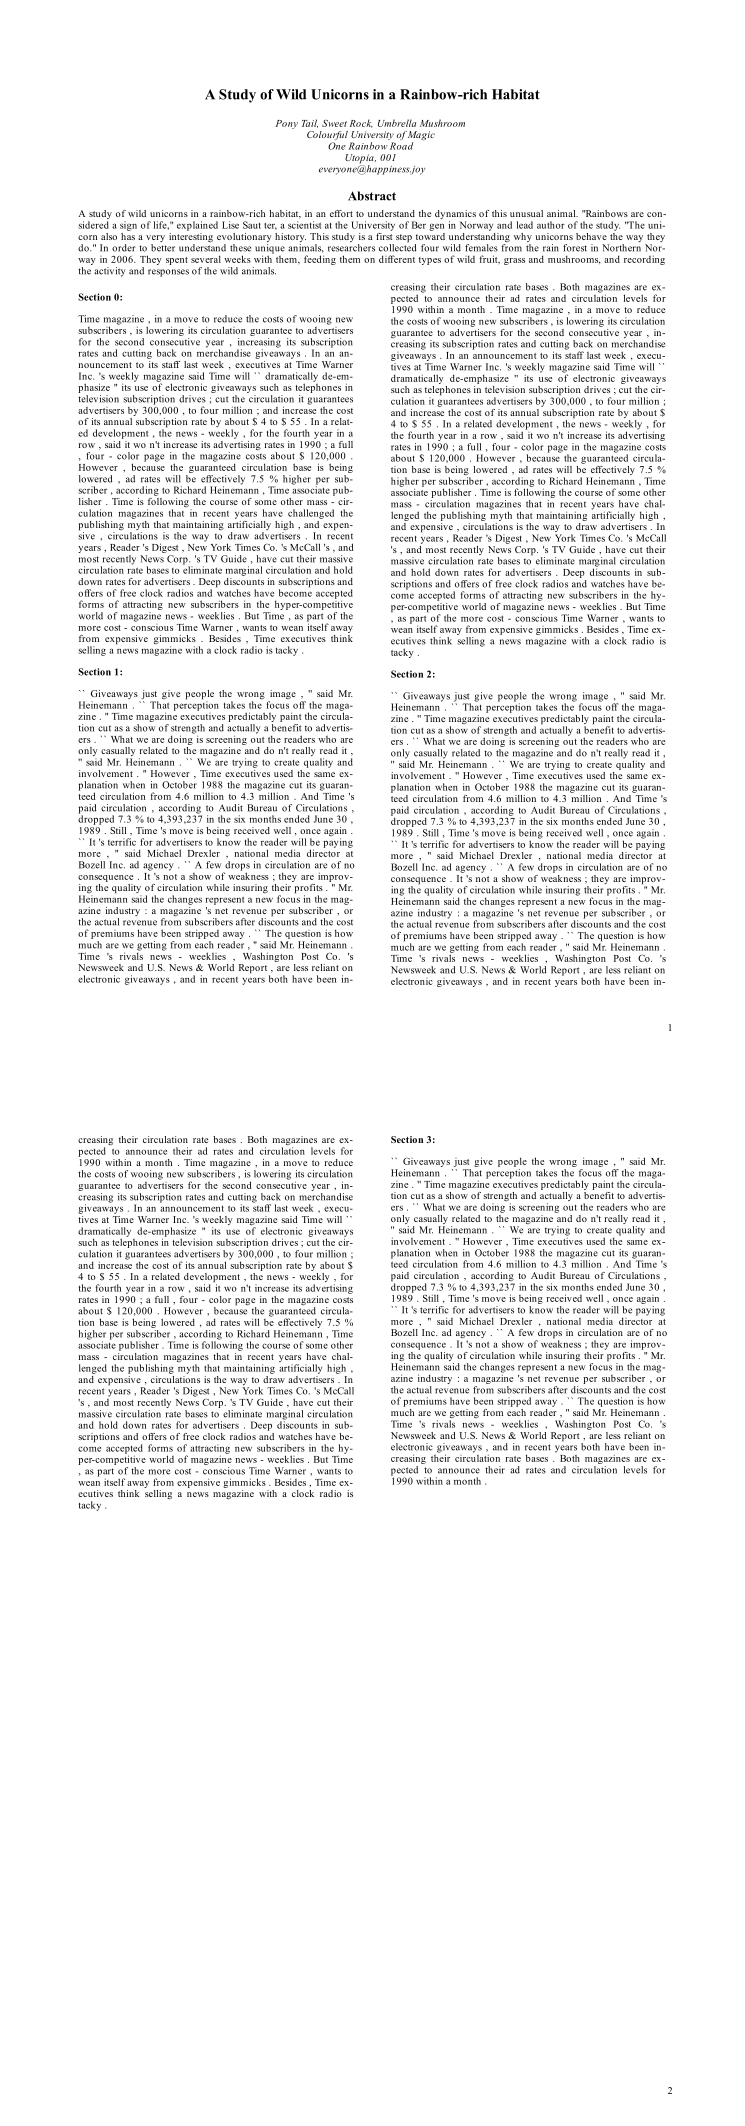

{'language': 'en_US', 'font_family': 'Times', 'font_size': '11px', 'text_align': 'justify', 'hyphenate': True}
letter.html.jinja


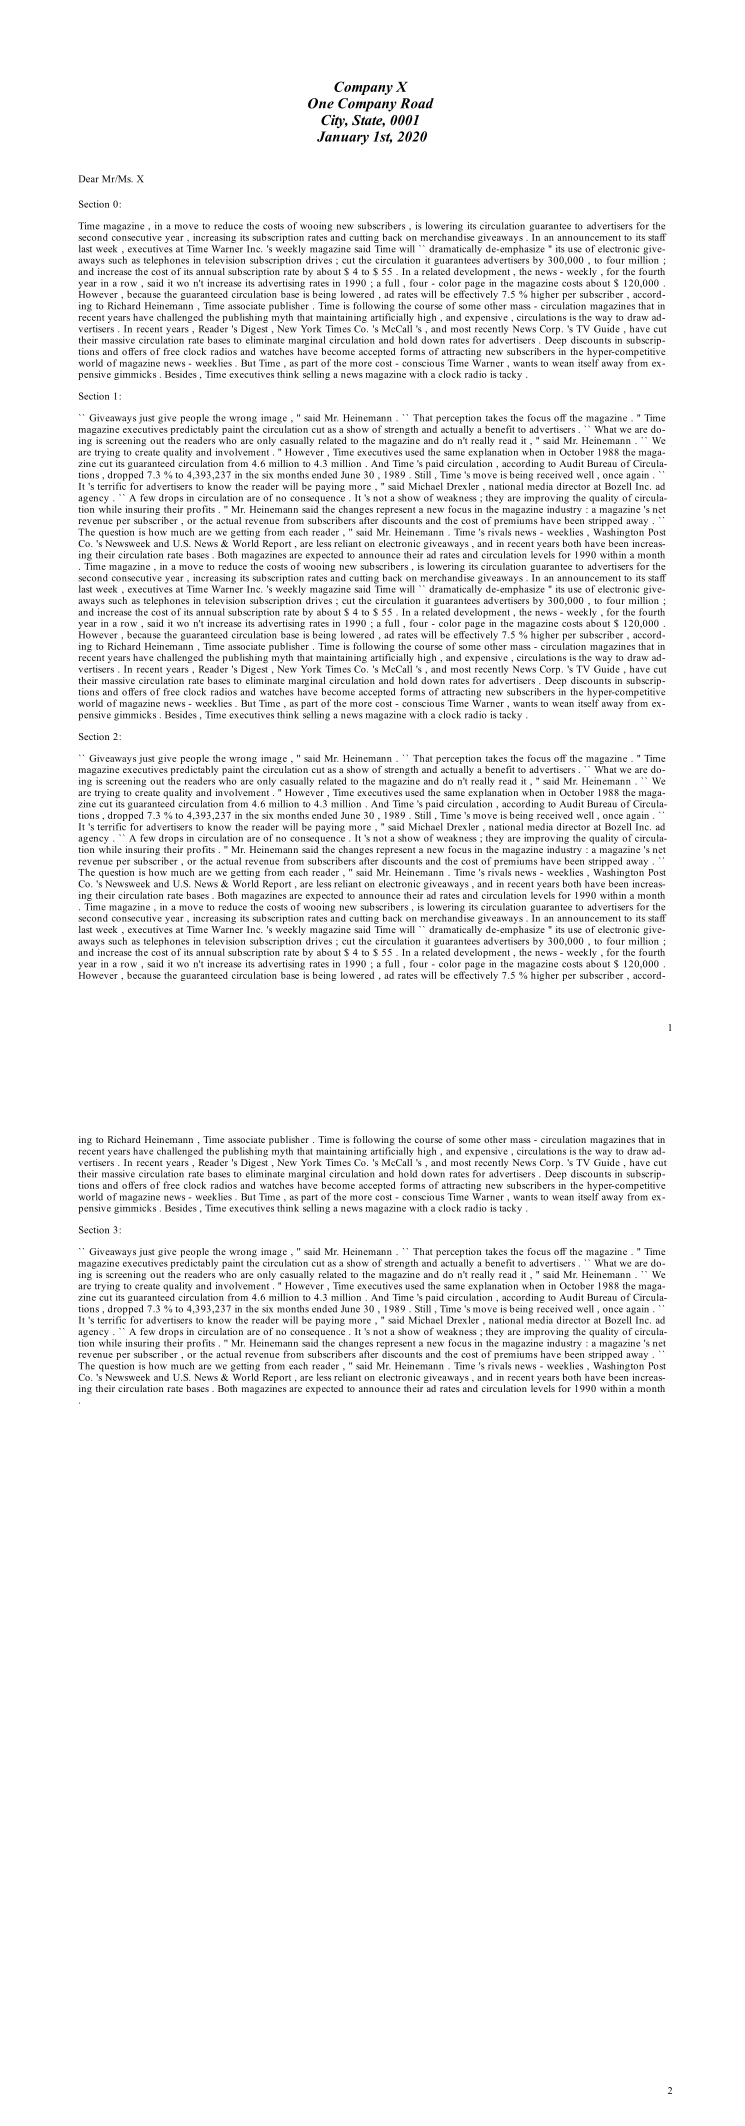

In [27]:
from IPython.core.display import Image, display
doc_gen = default_generator.create_generator(titled_content, ["columns.html.jinja", "letter.html.jinja"])

for doc in doc_gen:
    print(doc.styles)
    print(doc.template.name)
    # Save with different resolution
    image_byte = doc.render_png(resolution=90)
    display(Image(image_byte))

In [28]:
doc_gen = default_generator.create_generator(titled_content, ["columns.html.jinja", "letter.html.jinja"])
default_generator.set_styles_to_generate(new_style_combinations)
# Or you can save the document as a separate file
for doc in doc_gen:
    template_name = doc.template.name.replace(".html.jinja", "")
    pdf_name = "sample/generation/" + template_name + "_" + doc.styles["font_family"] + "_" + doc.styles["font_size"]  + ".pdf"
    png_name = pdf_name.replace(".pdf", ".png")
    doc.render_pdf(target=pdf_name, zoom=2)
    doc.render_png(target=png_name, resolution=100)

In [33]:
# Save as separate PNG files
doc_gen = default_generator.create_generator(content, ["text_block.html.jinja"])
default_generator.set_styles_to_generate(new_style_combinations)
# Configure image resolution in dots per inch (dpi)
resolution = 300
for doc in doc_gen:
    template_name = doc.template.name.replace(".html.jinja", "")
    png_name = "sample/generation/" + template_name + "_" + doc.styles["font_family"] + "_" + doc.styles["font_size"] + ".png"
    doc.render_png(target=png_name, split_pages=True, resolution=resolution)

In [30]:
pdf_name

'sample/generation/letter_Times_11px.pdf'